In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from config import *


## Переведем в паркеты

In [1]:
!python to_parquets.py

## Notes:

1. операции записываются подневно!

## Данные о вводе товаров в оборот

In [11]:
input_circulation_data = pd.read_csv(INPUT_CIRCULATION_FILENAME)

In [12]:
input_circulation_data.head()

,dt,inn,gtin,prid,operation_type,cnt
0,2021-11-22,F0C677A146366202906368AF9FCEC188,C238E7C33B56BA911F576777316EC9F2,F0C677A146366202906368AF9FCEC188,Импорт. Не ЕАЭС,6
1,2021-11-22,F0DC262C40FBA363CFCEF8005E4C6140,4D3423957ECDC40F70E37EB75A6A2D3E,F0DC262C40FBA363CFCEF8005E4C6140,Перемаркировка,10
2,2021-11-22,32D845A9CC2A5BFA9F77CAE0E9A905A5,F1931263F03E1D89A43A3633AAF9FB84,32D845A9CC2A5BFA9F77CAE0E9A905A5,Импорт. Не ЕАЭС,600
3,2021-11-22,CE816FDF82B121C67CAE9B79203B8BA1,0374D8CAC82E9F0D47C95FA13D68C7C6,CE816FDF82B121C67CAE9B79203B8BA1,Импорт. Не ЕАЭС,1860
4,2021-11-22,E34F3F6C9E49FE46C87D067306AAC29B,BBC31CA374A30B34CAFBFD027888A73D,E34F3F6C9E49FE46C87D067306AAC29B,РФ,1


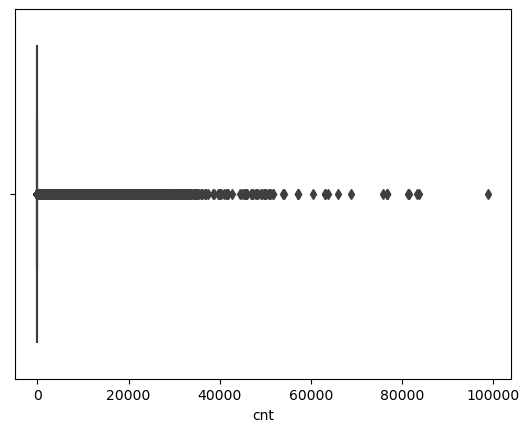

In [15]:
sns.boxplot(data=input_circulation_data, x="cnt")
plt.show()

операции записываются подневно!

In [19]:
sorted(input_circulation_data.dt.unique())

['2021-11-22',
 '2021-11-23',
 '2021-11-24',
 '2021-11-25',
 '2021-11-26',
 '2021-11-27',
 '2021-11-28',
 '2021-11-29',
 '2021-11-30',
 '2021-12-01',
 '2021-12-02',
 '2021-12-03',
 '2021-12-04',
 '2021-12-05',
 '2021-12-06',
 '2021-12-07',
 '2021-12-08',
 '2021-12-09',
 '2021-12-10',
 '2021-12-11',
 '2021-12-12',
 '2021-12-13',
 '2021-12-14',
 '2021-12-15',
 '2021-12-16',
 '2021-12-17',
 '2021-12-18',
 '2021-12-19',
 '2021-12-20',
 '2021-12-21',
 '2021-12-22',
 '2021-12-23',
 '2021-12-24',
 '2021-12-25',
 '2021-12-26',
 '2021-12-27',
 '2021-12-28',
 '2021-12-29',
 '2021-12-30',
 '2021-12-31',
 '2022-01-01',
 '2022-01-02',
 '2022-01-03',
 '2022-01-04',
 '2022-01-05',
 '2022-01-06',
 '2022-01-07',
 '2022-01-08',
 '2022-01-09',
 '2022-01-10',
 '2022-01-11',
 '2022-01-12',
 '2022-01-13',
 '2022-01-14',
 '2022-01-15',
 '2022-01-16',
 '2022-01-17',
 '2022-01-18',
 '2022-01-19',
 '2022-01-20',
 '2022-01-21',
 '2022-01-22',
 '2022-01-23',
 '2022-01-24',
 '2022-01-25',
 '2022-01-26',
 '2022-01-

## Данные о выводе товаров из оборота

### NOTES

1. сегрегировать розничные сделки от оптовых 
2. перепад температур 


In [5]:
output_circulation_data = pd.read_parquet(OUTPUT_CIRCULATION_PARQUET_FILENAME)

In [10]:
output_circulation_data.head()

,dt,gtin,prid,inn,id_sp_,type_operation,price,cnt
0,2021-11-22,5A3E5F7B2D093D1D6CB3CF93BA9AC8A6,DC7432556B58D454B4E37F0F0D1E663D,B035ED5D308BC70E5EA9342B6DBF5810,19485F700068E6A9A8593AFDE9803638,Продажа конечному потребителю в точке продаж,3500,1
1,2021-11-22,9A2202A48FC5E462C44B78B0C79E1DBD,D18B1B470E57871FAB5B4E949E256BB4,DD486FED86564603D2CD7CF9EED2C458,C2969A4C8A40C12902EAD4936E303045,Продажа конечному потребителю в точке продаж,56714,1
2,2021-11-22,877ABE9DE14E0B510DFC8DE63EEFA817,62B5EAEF59E6693F44B1074C1140BF45,62B5EAEF59E6693F44B1074C1140BF45,5637334F301773E28AE8730713E6D5F7,Продажа конечному потребителю в точке продаж,74314,1
3,2021-11-22,B004F889F17F8AB365C494B3D0D06E1A,D7326D87A37D73AF19AF53668A7116D6,D7326D87A37D73AF19AF53668A7116D6,0FF56DEC16050D3B6372F2CB1BD6DFCB,Продажа конечному потребителю в точке продаж,4999,1
4,2021-11-22,E1C0503EA9201D56D7173CB4CA4A6AFA,50955BB0B97298EEAEB1F6CF9712F37A,39FFA592BE77CA7DE37C65C1B8423E8C,9E660AA1DE428BA88D1942DB2824BDAB,Продажа конечному потребителю в точке продаж,29857,1


In [ ]:
sns.boxplot(data=output_circulation_data, x="cnt")

In [9]:
output_circulation_data.cnt.max()

145162

## Данные о перемещениях товаров 

In [2]:
transition_circulation_data = pd.read_parquet(TRANSITION_CIRCULATION_PARQUET_FILENAME)

In [4]:
transition_circulation_data.head()

,dt,gtin,prid,sender_inn,receiver_inn,cnt_moved
0,2021-11-22,867FDFE9E03925792F329DEDBAA3955F,9246A2BE043136FC4B4A166BB0E25D3E,2E55013259E009F4FC1E5EFCF170EA8B,8D5F8E7D20AD9A8D0E8EE5769321D8C3,1
1,2021-11-22,4FB53B945150E362C307D60297066562,9246A2BE043136FC4B4A166BB0E25D3E,32B53198A919C559CB84DC0487947E80,EDE6F6D21300D96A9E207EA4F59321EF,1
2,2021-11-22,38BA9B93C5C987770AD698646D2FAB66,2DADC5DF60A9FC194A3388C1612CC967,3A87113AC25EFD88BD3407ACECFA3869,D02A2294DDF3BCF7218D6FEFDB35A906,1
3,2021-11-22,FA77213DA058666C6781164754CBC0EB,FFC432B34974A68B2845FBED9A7DEB29,C5CDC4F467B7CDA0F3E082BFFEDA9938,051C7D77FE590C5428DB57FD48C5DB9C,3
4,2021-11-22,E5635C538FE51D88504CE5CFF8BC1D2C,6E536425E534ABA7AB9FEA2ACA91A775,AE7F5C67298A67CACD2A193C9405524F,0D28C0E0C8ADAA3D9B55B557C71D8A8E,2


<AxesSubplot: xlabel='cnt_moved'>

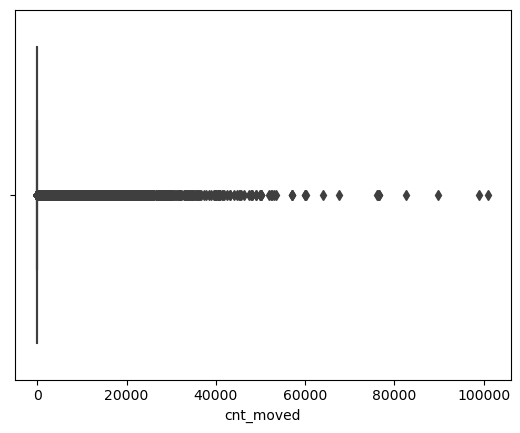

In [10]:
sns.boxplot(data=transition_circulation_data, x="cnt_moved")